In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
url = 'https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df = pd.read_csv(url, header= None)

In [ ]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.columns=['Size', 'Bedrooms', 'Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.dtypes

Size        int64
Bedrooms    int64
Price       int64
dtype: object

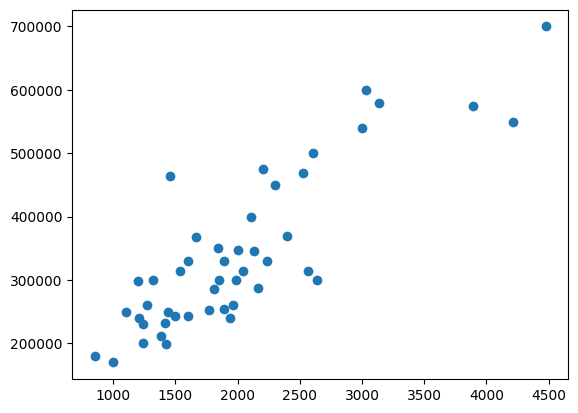

In [ ]:
plt.plot(df.Size, df.Price, 'o')
plt.show()

In [ ]:
#y=1000+400*x

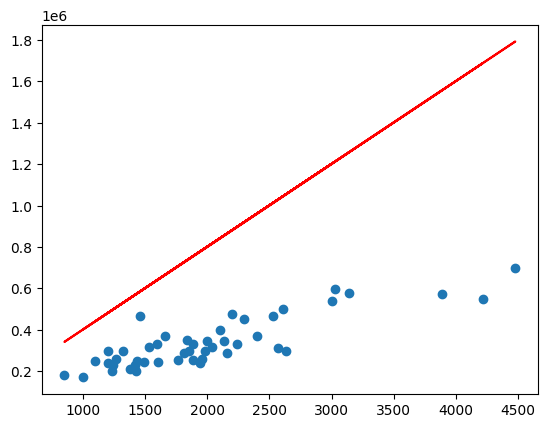

In [ ]:
plt.plot(df.Size, df.Price, 'o')
plt.plot(df.Size, 1000 + df['Size']*400, 'r')

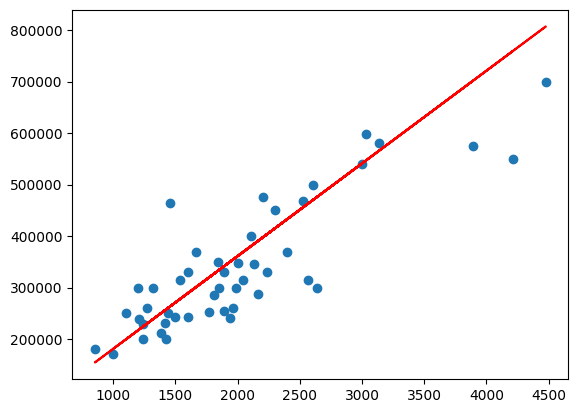

In [ ]:
plt.plot(df.Size, df.Price, 'o')
plt.plot(df.Size, 1000 + df['Size']*180, 'r')

In [ ]:
#gradient

#przyporządkowanie zmiennej zależnej i niezależnej
X=df['Size'].values
y=df['Price'].values

X=np.column_stack(([1]*len(X),X)) # dodanie kolumny z jedynkami - technikalia

In [ ]:
from pandas.core.computation.pytables import Constant
def gradientDescent(X,y,theta,alpha,m,numIterations):
  '''
  param: X - zmienne niezalezne
  param: y - zmienna zalezna
  param: theta - macierz [Theta_0 czyli punkt przeciecia/wyraz wolny, Theta_1 czyli wspolczynnik od X1]
  param: alpha - wspolczynnik uczenia - jak duze kroki zrobic
  param: m - liczba obserwacji
  param: numIterations - liczba iteracji naszego modelu, czyli ile krokow zrobic
  '''
  xTrans=X.transpose()                        # potrzebne do obliczenia gradientow (technikalia)
  cost_array=np.empty([numIterations,2])      # pusta macierz, do ktorej bede zapisywac wartosc funkcji kosztu po kazdej iteracji
  for i in range(0,numIterations):            #petla
    hypothesis=np.dot(X,theta)                #bierzemy kazdy x, mnozymy przez theta_1 i dodajemy theta_0 - przewiduje cene domu
    loss=hypothesis-y                         #odleglosc kropek od linii, innymi slowy reszty/roznice
    cost=np.sum(loss**2)/(2*m)                #wartosc funkcji kosztu
    print('Iteration %d | Cost %f' %(i,cost))
    cost_array[i][0]=i                  
    cost_array[i][1]=cost
    gradient=np.dot(xTrans,loss)/m            #pochodna cząstkowa funkcji
    theta=theta-alpha*gradient
  return theta,cost_array


In [ ]:
m=len(X)
numIterations=100
alpha=0.000000005
theta=[10000,200] #theta0, theta1
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 5813726085.180851
Iteration 1 | Cost 5653659117.186038
Iteration 2 | Cost 5500903142.155312
Iteration 3 | Cost 5355124233.489674
Iteration 4 | Cost 5216003716.550321
Iteration 5 | Cost 5083237472.031587
Iteration 6 | Cost 4956535271.152115
Iteration 7 | Cost 4835620141.210864
Iteration 8 | Cost 4720227760.121082
Iteration 9 | Cost 4610105878.598697
Iteration 10 | Cost 4505013768.742012
Iteration 11 | Cost 4404721697.797319
Iteration 12 | Cost 4309010425.960013
Iteration 13 | Cost 4217670727.113470
Iteration 14 | Cost 4130502931.457944
Iteration 15 | Cost 4047316489.029737
Iteration 16 | Cost 3967929553.156440
Iteration 17 | Cost 3892168582.937661
Iteration 18 | Cost 3819867963.882317
Iteration 19 | Cost 3750869645.873138
Iteration 20 | Cost 3685022797.667014
Iteration 21 | Cost 3622183477.175863
Iteration 22 | Cost 3562214316.807333
Iteration 23 | Cost 3504984223.177387
Iteration 24 | Cost 3450368090.538431
Iteration 25 | Cost 3398246527.296483
Iteration 26 | Cost 33

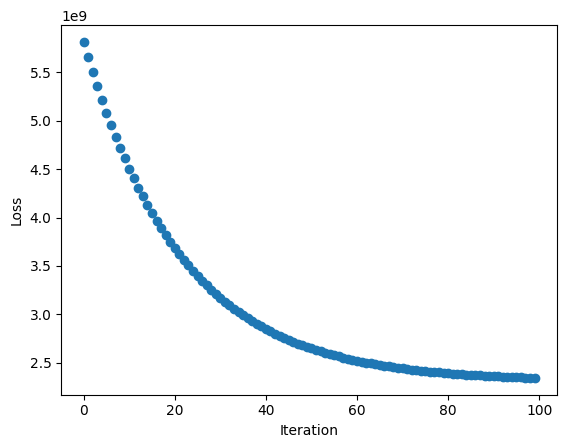

In [ ]:
epoch=range(len(cost_array[:,0]))
plt.plot(epoch,cost_array[:,1],'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
theta

array([9999.98886371,  164.81443774])

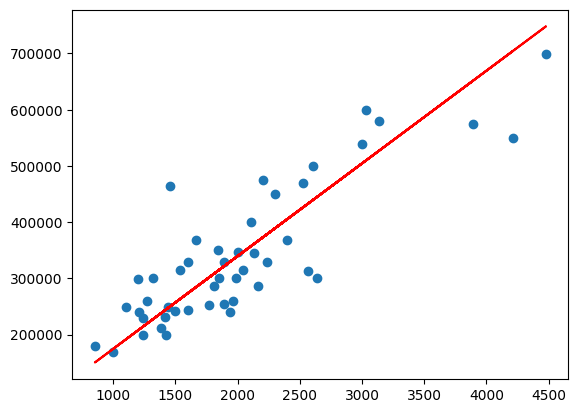

In [ ]:
plt.plot(df['Size'], df['Price'], 'o')
plt.plot(df['Size'], theta[0]+df["Size"]*theta[1], 'r')
plt.show()

In [ ]:
#sklearn

#Regresja dla jednej zmiennej

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
#theta 0, wyraz wolny
model.intercept_

71270.49244872917

In [ ]:
model.coef_

array([134.52528772])

In [ ]:
predict_data=np.array([[3200], [3700]])
predict_data

array([[3200],
       [3700]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([501751.4131535 , 569014.05701362])

Text(0.5, 0, 'Size')

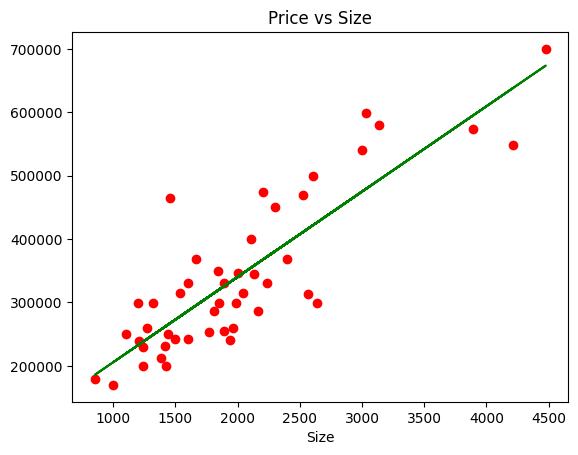

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='green')
plt.title('Price vs Size')
plt.xlabel('Size')

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(x_range.reshape(-1,1))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Regression Fit'))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Regresja wielu zmiennych

In [ ]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X=df[['Size', 'Bedrooms']]
y=df['Price']

In [ ]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_

89597.90954279754

In [ ]:
model.coef_

array([  139.21067402, -8738.01911233])

In [ ]:
predict_data=np.array([[3200,3], [3720,2], [5000,6]])
predict_data

array([[3200,    3],
       [3720,    2],
       [5000,    6]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([508858.00906222, 589985.57866371, 733223.16495696])

#Zadania regresja liniowa jednej oraz wielu zmiennych

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import files
import io

In [ ]:
#wczytamy dane

url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#atemp - temperatura odczuwalna danego dnia, według dokumentacji zmienna została znormalizowana i wystandaryzowana - przyjmuje wartości od 0 do 1
#cnt - ilość wypożyczonych rowerów danego dnia 

In [ ]:
#przypisz atemp jako zmienną niezależną i cnt jako zmienną zależną

X=df['atemp'].values
y=df['cnt'].values

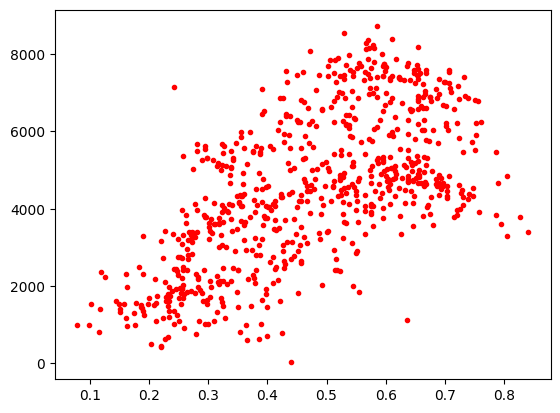

In [ ]:
 #stwórz wykres porównujący atemp z cnt

plt.plot(df['atemp'],df['cnt'],'r.')
plt.show()

In [ ]:
#przy wykorzystaniu funkcji gradientDescent wyćwicz model (osiągnij minimum lokalne funkcji kosztu)

X=np.column_stack(([1]*len(X),X))
X

array([[1.      , 0.363625],
       [1.      , 0.353739],
       [1.      , 0.189405],
       ...,
       [1.      , 0.2424  ],
       [1.      , 0.2317  ],
       [1.      , 0.223487]])

In [ ]:
m=len(X)
numIterations=3000
alpha=0.1
theta=[0,0]
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 12018406.441176
Iteration 1 | Cost 9602195.925103
Iteration 2 | Cost 7743383.111946
Iteration 3 | Cost 6313285.769408
Iteration 4 | Cost 5212929.980661
Iteration 5 | Cost 4366191.511097
Iteration 6 | Cost 3714520.598765
Iteration 7 | Cost 3212884.610151
Iteration 8 | Cost 2826647.397878
Iteration 9 | Cost 2529169.107907
Iteration 10 | Cost 2299960.109109
Iteration 11 | Cost 2123261.117322
Iteration 12 | Cost 1986951.120161
Iteration 13 | Cost 1881707.424619
Iteration 14 | Cost 1800359.620924
Iteration 15 | Cost 1737392.694038
Iteration 16 | Cost 1688564.849698
Iteration 17 | Cost 1650613.571348
Iteration 18 | Cost 1621029.538464
Iteration 19 | Cost 1597882.739398
Iteration 20 | Cost 1579688.728820
Iteration 21 | Cost 1565305.761734
Iteration 22 | Cost 1553855.675734
Iteration 23 | Cost 1544663.038831
Iteration 24 | Cost 1537208.345975
Iteration 25 | Cost 1531092.020889
Iteration 26 | Cost 1526006.728651
Iteration 27 | Cost 1521716.080354
Iteration 28 | Cost 1518038.2

In [ ]:
theta

array([ 950.08406197, 7493.04678383])

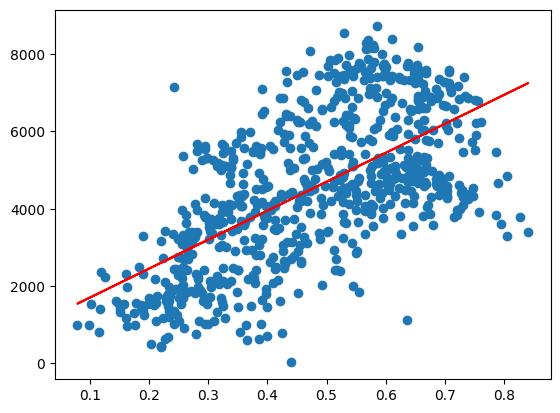

In [ ]:
#narysuj prostą regresji na wykresie z naszymi obserwacjami

plt.plot(df['atemp'],df['cnt'],'o')
plt.plot(df['atemp'],theta[0]+df['atemp']*theta[1],'r')
plt.show()

In [ ]:
#na podstawie wytrenowanych wspolczynnikow theta stworz funkcję
#zdolna do predykcji ilosci wypozyczonych rowerow w zaleznosci od temperatury

def predict_price(x,theta_0,theta_1):
  result=theta_0+theta_1*x
  return result

In [ ]:
#stworz predykcję ilości wypożyczonych rowerów na dzień, w którym unormalizowana temperatura wynosila 0.8

predict_price(x=0.8,theta_0=theta[0],theta_1=theta[1])

6944.521489037999

sklearn - regresja wielu zmiennych

In [ ]:
#jako zmienną zależną ponownie wybierzemy cnt

y = df['cnt']

#jako zmienne niezależne atemp (temperatura), hum (wilgotnosc), windspeed (predkosc wiatru), workingday (czy dany dzien jest pracujacy)

X = df[['atemp', 'hum', 'windspeed', 'workingday']]

In [ ]:
#wytrenuj model (metoda fit)

reg = LinearRegression().fit(X,y)

In [ ]:
#sprawdz wielkosc interceptu i wspolczynnikow regresji

print(reg.intercept_)
print(reg.coef_)

3698.4373927964907
[ 7486.28341042 -3174.17132979 -4407.19069508   127.65517425]


In [ ]:
#napisz wzór końcowy modelu

$y = 3698 + 7486*atemp - 3174*hum -4407*windspeed + 127*workingday $

In [ ]:
#zinterpretuj współczynniki modelu

# 3698 - w dniu z temperaturą znormalizowaną 0, wilgotnością znormalizowaną 0, wiatrem znormalizowanym 0, i w dniu niepracującym tyle będzie wyporzyczeń rowerów
# 7486 * atemp - wraz ze wzrostem atemp o jednostkę liczba wypożyczeń rowerów rośnie o 7486
# 3174 * hum - wraz ze wzrostem hum o jednostkę liczba wypożyczeń rowerów spada o 3174
# 4407 * windspeed - wraz ze wzrostem windspeed o jednostkę liczba wypożyczeń rowerów spada o 4407
# 127 * workingday (zmienna binarna) - w dniu pracującym liczba rowerów w stosunku do dnia wolnego wzrasta o 127

In [ ]:
#stwórz predykcję ilości wypożyczonych rowerów w dzień, gdzie atemp=0.5, hum=0.3, windspeed=0.25, dzień jest pracujący

reg.predict([[0.5,0.3,0.25,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5515.18519955])